In [109]:
import pandas as pd
import numpy as np

import re
import nltk
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import TweetTokenizer
from collections import defaultdict

In [110]:
dataset_path = './data/sentiment_analysis.csv'
df = pd.read_csv(dataset_path, index_col ='id')
df.head()

,label,tweet
id,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,0,Finally a transparant silicon case ^^ Thanks t...
3,0,We love this! Would you go? #talk #makememorie...
4,0,I'm wired I know I'm George I was made that wa...
5,1,What amazing service! Apple won't even talk to...


### Tiền xử lý bộ dữ liệu

In [111]:
def text_normalize(text):
    # Retweet old acronym "RT" removal
    text = re.sub(r'^RT[\s]+', '', text)

    # Hyperlinks removal
    text = re.sub(r'https?://.*[\r\n]*', '', text)

    # Hashtags removal
    text = re.sub(r'#', '', text)

    # Punctuation removal
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization
    tokenizer = TweetTokenizer(
        preserve_case=False,
        strip_handles=True,
        reduce_len=True
    )
    text_tokens = tokenizer.tokenize(text)

    return text_tokens


df['tweet'] = df['tweet'].apply(text_normalize)

In [112]:
df.head()

,label,tweet
id,,
1,0,"[fingerprint, pregnancy, test]"
2,0,"[finally, a, transparant, silicon, case, thank..."
3,0,"[we, love, this, would, you, go, talk, makemem..."
4,0,"[im, wired, i, know, im, george, i, was, made,..."
5,1,"[what, amazing, service, apple, wont, even, ta..."


#### Xây dựng bộ lưu giữ tần suất xuất hiện của các từ
defaultdict khác với dict thông thường ở điểm defaultdict tự động gán giá trị mặc định cho các key mới, ở đây ta gán bằng 0 .

In [113]:
def get_BoW(df: pd.DataFrame):
    Bow_freq = defaultdict(lambda: 0)
    for index, samples in df.iterrows():
        label, tokens = samples['label'], samples['tweet']
        for token in tokens:
            key = (token, label)
            Bow_freq[key] += 1

    return Bow_freq


Bow_freq = get_BoW(df)
print(Bow_freq)

defaultdict(<function get_BoW.<locals>.<lambda> at 0x000002876188B370>, {('fingerprint', 0): 4, ('pregnancy', 0): 1, ('test', 0): 8, ('finally', 0): 168, ('a', 0): 727, ('transparant', 0): 1, ('silicon', 0): 1, ('case', 0): 228, ('thanks', 0): 94, ('to', 0): 876, ('my', 0): 1227, ('uncle', 0): 4, ('yay', 0): 63, ('sony', 0): 701, ('xperia', 0): 54, ('s', 0): 38, ('sonyexperias', 0): 1, ('we', 0): 159, ('love', 0): 385, ('this', 0): 456, ('would', 0): 95, ('you', 0): 557, ('go', 0): 67, ('talk', 0): 12, ('makememories', 0): 1, ('unplug', 0): 2, ('relax', 0): 31, ('iphone', 0): 2905, ('smartphone', 0): 61, ('wifi', 0): 36, ('connect', 0): 1, ('im', 0): 182, ('wired', 0): 4, ('i', 0): 1046, ('know', 0): 58, ('george', 0): 1, ('was', 0): 68, ('made', 0): 46, ('that', 0): 153, ('way', 0): 32, ('cute', 0): 261, ('daventry', 0): 1, ('home', 0): 116, ('what', 1): 72, ('amazing', 1): 7, ('service', 1): 25, ('apple', 1): 1258, ('wont', 1): 71, ('even', 1): 53, ('talk', 1): 3, ('to', 1): 990, ('m

#### Xây dựng hàm tạo vector đặc trưng

In [114]:
def get_feature(df: pd.DataFrame, Bow_freq):
    features_list = []  # Danh sách lưu trữ các features của mỗi sample

    for index, samples in df.iterrows():
        features = np.zeros(df.shape[1] + 1)
        features[0] = 1
        label, tokens = samples['label'], samples['tweet']

        for token in tokens:
            features[1] += Bow_freq.get((token, 0), 0)
            features[2] += Bow_freq.get((token, 1), 0)

        features_list.append(features)  # Thêm features vào danh sách

    df['tweet'] = features_list  # Gán danh sách các features vào cột 'tweet'
    return features_list


features = get_feature(df, Bow_freq)
print(features)

[array([ 1., 13.,  2.]), array([1.000e+00, 4.183e+03, 2.788e+03]), array([1.000e+00, 4.768e+03, 1.425e+03]), array([1.000e+00, 6.101e+03, 3.153e+03]), array([1.000e+00, 7.055e+03, 6.231e+03]), array([1.000e+00, 4.950e+03, 2.521e+03]), array([1.00e+00, 1.85e+03, 5.31e+02]), array([   1., 1000.,  273.]), array([1.000e+00, 5.203e+03, 2.830e+03]), array([1.000e+00, 2.224e+03, 1.230e+02]), array([1.000e+00, 7.031e+03, 5.062e+03]), array([1.000e+00, 6.339e+03, 5.995e+03]), array([1.000e+00, 6.425e+03, 3.213e+03]), array([1.000e+00, 5.160e+03, 4.244e+03]), array([1.000e+00, 4.517e+03, 4.243e+03]), array([1.000e+00, 1.053e+03, 1.840e+02]), array([1.000e+00, 9.448e+03, 3.540e+03]), array([1.000e+00, 3.942e+03, 6.880e+02]), array([1.000e+00, 6.829e+03, 4.316e+03]), array([1.000e+00, 7.150e+03, 6.302e+03]), array([1.0000e+00, 1.2395e+04, 1.0291e+04]), array([1.000e+00, 5.845e+03, 4.725e+03]), array([1.000e+00, 6.913e+03, 5.013e+03]), array([1.000e+00, 7.293e+03, 4.367e+03]), array([1.000e+00, 3.9

In [115]:
df.head()

,label,tweet
id,,
1,0,"[1.0, 13.0, 2.0]"
2,0,"[1.0, 4183.0, 2788.0]"
3,0,"[1.0, 4768.0, 1425.0]"
4,0,"[1.0, 6101.0, 3153.0]"
5,1,"[1.0, 7055.0, 6231.0]"


### Chia bộ train, val, test

In [116]:
x = np.array(features)
y = df['label'].to_numpy()

In [117]:
test_size = 0.125
val_size = 0.2
random_state = 2
is_shuffle = True
x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=val_size, random_state=2, shuffle=is_shuffle)

x_train, x_test, y_train, y_test = train_test_split(
    x_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

### Chuẩn hóa dữ liệu

In [118]:
scaler = StandardScaler()
x_train[:, 1:] = scaler.fit_transform(x_train[:, 1:])
x_val[:, 1:] = scaler.transform(x_val[:, 1:])
x_test[:, 1:] = scaler.transform(x_test[:, 1:])

### Cài đặt các hàm quan trọng

In [119]:
import numpy as np

def predict(theta, x):
    z = np.dot(x, theta)
    y_hat = 1 / (1 + np.exp(-z))
    return y_hat

def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
    L = (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()
    return round(L, 3)

def compute_gradient(x, y_hat, y):
    gradient = np.dot(x.T, (y_hat - y)) / len(y)
    return np.round(gradient, 3)  # Làm tròn từng phần tử của gradient

def update_parameters(theta, lr, gradient):
    new_theta = theta - lr * gradient
    return np.round(new_theta, 3)  # Làm tròn từng phần tử của theta mới

def compute_accuracy(x, y, theta):
    label = predict(theta, x).round()
    acc = (label == y).mean()
    return round(acc, 3)

### Khai báo các siêu tham số và khởi tạo weights

In [120]:
lr = 0.01
epochs = 200
batch_size = 128

np.random.seed(random_state)
# uniform random từ 0 - 1
theta = np.random.uniform(
    size=x_train.shape[1]
)

### Huấn luyện mô hình

In [121]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []


for epoch in range(epochs):
    accuracy_batch_val = []
    accuracy_batch_train = []
    loss_batch_val = []
    loss_batch_train = []
    for i in range(0, x_train.shape[0], batch_size):
        x_batch_train = x_train[i:i + batch_size]
        y_batch_train = y_train[i:i + batch_size]

        y_hat = predict(theta=theta, x=x_batch_train)
        gradient = compute_gradient(x_batch_train, y_hat, y_batch_train)
        theta = update_parameters(theta, lr, gradient)

        loss_batch_train.append(compute_loss(y_hat, y_batch_train))
        accuracy_batch_train.append(compute_accuracy(x_train, y_train, theta))

        y_hat_val = predict(theta=theta, x=x_val)
        loss_batch_val.append(compute_loss(y_hat_val, y_val))
        accuracy_batch_val.append(compute_accuracy(x_val, y_val, theta))

    train_batch_loss = sum(loss_batch_train) / len(loss_batch_train)
    val_batch_loss = sum(loss_batch_val) / len(loss_batch_val)
    train_batch_acc = sum(accuracy_batch_train) / len(accuracy_batch_train)
    val_batch_acc = sum(accuracy_batch_val) / len(accuracy_batch_val)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    if epoch >= 90:
        print(
            f"\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}")


EPOCH 91:	Training loss: 0.394	Validation loss: 0.390

EPOCH 92:	Training loss: 0.394	Validation loss: 0.390

EPOCH 93:	Training loss: 0.394	Validation loss: 0.390

EPOCH 94:	Training loss: 0.394	Validation loss: 0.389

EPOCH 95:	Training loss: 0.393	Validation loss: 0.389

EPOCH 96:	Training loss: 0.393	Validation loss: 0.389

EPOCH 97:	Training loss: 0.393	Validation loss: 0.389

EPOCH 98:	Training loss: 0.393	Validation loss: 0.389

EPOCH 99:	Training loss: 0.393	Validation loss: 0.388

EPOCH 100:	Training loss: 0.392	Validation loss: 0.388

EPOCH 101:	Training loss: 0.392	Validation loss: 0.388

EPOCH 102:	Training loss: 0.392	Validation loss: 0.388

EPOCH 103:	Training loss: 0.392	Validation loss: 0.388

EPOCH 104:	Training loss: 0.392	Validation loss: 0.387

EPOCH 105:	Training loss: 0.392	Validation loss: 0.387

EPOCH 106:	Training loss: 0.391	Validation loss: 0.387

EPOCH 107:	Training loss: 0.391	Validation loss: 0.387

EPOCH 108:	Training loss: 0.391	Validation loss: 0.387



### Đánh giá mô hình

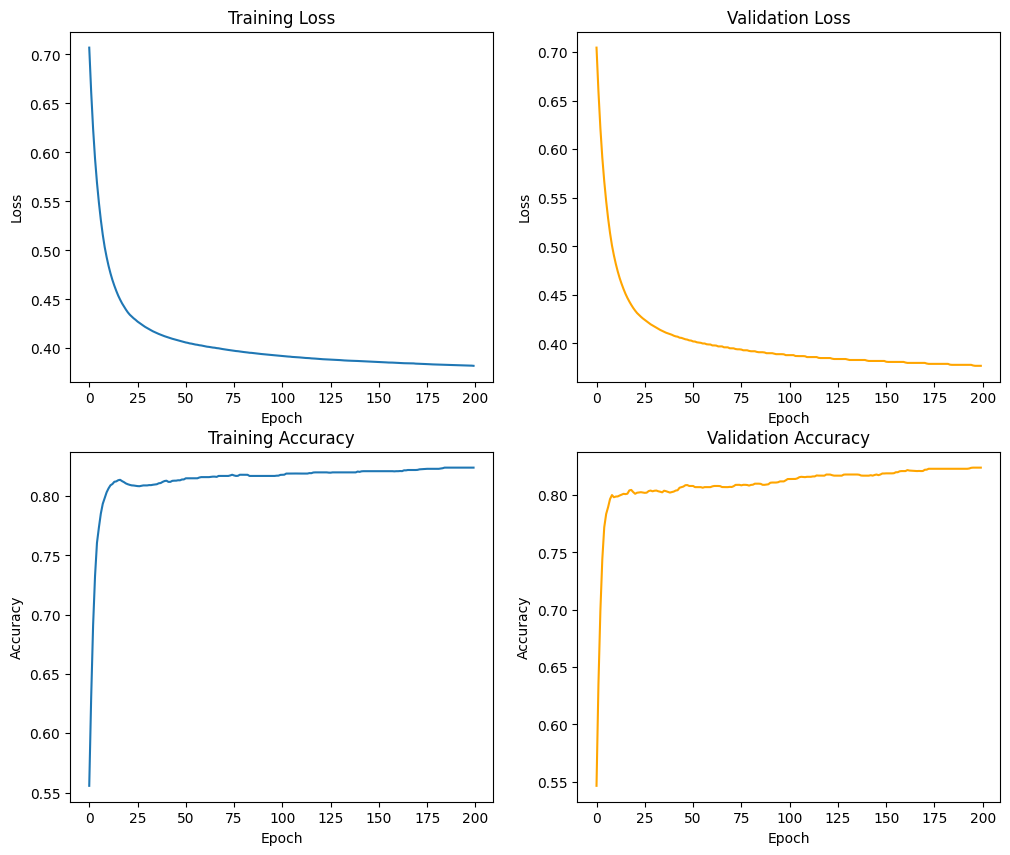

In [122]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()